# Iris Dataset Analysis and Visualization



## 1. Import Required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)

Matplotlib is building the font cache; this may take a moment.


## 2. Load and Explore the Dataset

In [2]:
# Define column names for the dataset (as they aren't included in the file)
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset from the file
iris_data_path = 'PYTHON/WEEK 6/iris/iris.data'
try:
    # Try to load the data
    iris_df = pd.read_csv(iris_data_path, header=None, names=column_names)
    print(f"Dataset loaded successfully with {iris_df.shape[0]} rows and {iris_df.shape[1]} columns.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display the first few rows to inspect the data
iris_df.head()

Dataset loaded successfully with 150 rows and 5 columns.


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check for missing values in the dataset
missing_values = iris_df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Check the data types of each column
print("\nData types of each column:")
print(iris_df.dtypes)

# Get a basic overview of the dataset
print("\nBasic information about the dataset:")
iris_df.info()


Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Data types of each column:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



Distribution of species in the dataset:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


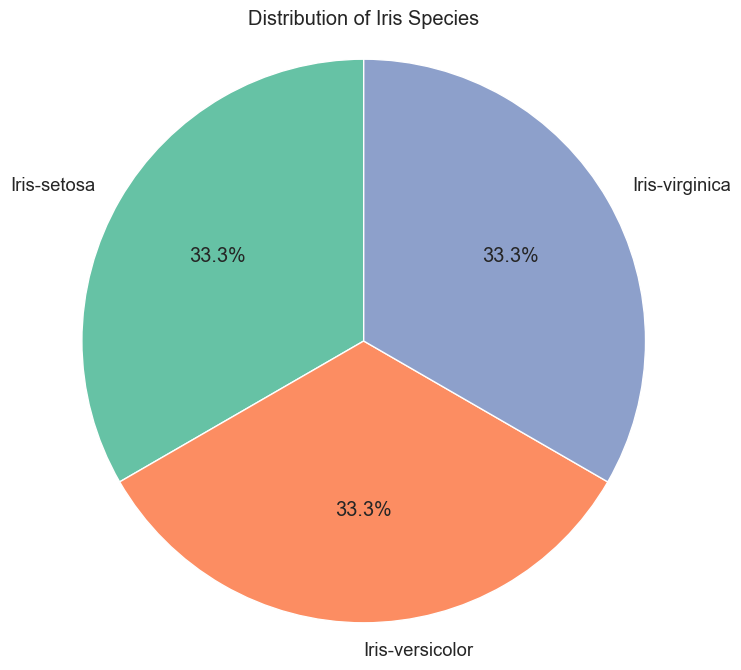

In [4]:
# Check the distribution of species in our dataset
species_count = iris_df['species'].value_counts()
print("\nDistribution of species in the dataset:")
print(species_count)

# Create a simple pie chart to visualize the species distribution
plt.figure(figsize=(8, 8))
plt.pie(species_count, labels=species_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribution of Iris Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## 3. Basic Statistical Analysis

In [5]:
# Calculate basic statistics for the numerical columns
iris_stats = iris_df.describe()
print("Basic statistics for the numerical columns:")
iris_stats

Basic statistics for the numerical columns:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Calculate the mean of each numerical feature for each species
species_means = iris_df.groupby('species').mean()
print("\nAverage measurements for each species:")
species_means


Average measurements for each species:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [7]:
# Calculate the correlation between different features
correlation_matrix = iris_df.iloc[:, :-1].corr()
print("\nCorrelation matrix between the features:")
correlation_matrix


Correlation matrix between the features:


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


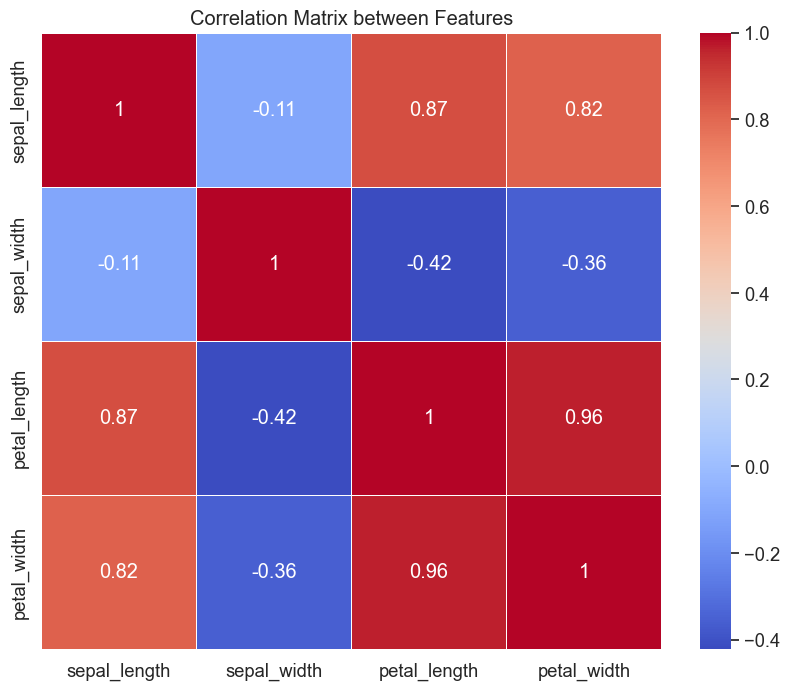

In [8]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between Features')
plt.show()

## 4. Data Visualization

### 4.1 Histogram - Distribution of Measurements

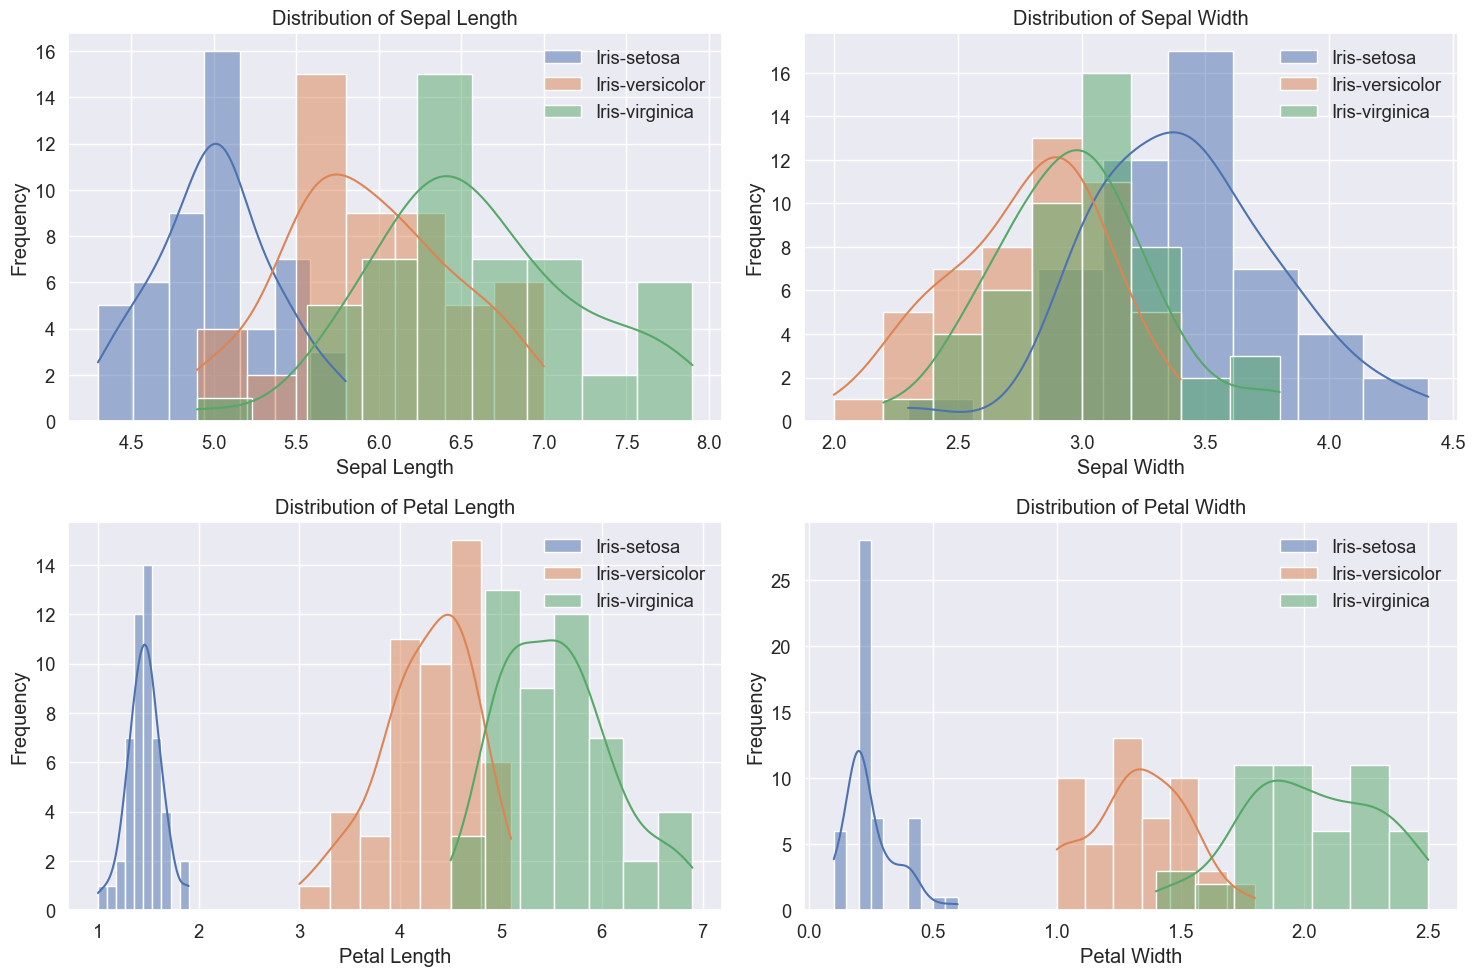

In [9]:
# Create histograms for each feature
plt.figure(figsize=(15, 10))

# Define feature columns
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    # Create histogram with KDE for each species
    for species in iris_df['species'].unique():
        sns.histplot(iris_df[iris_df['species'] == species][feature], kde=True, label=species)
    
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

### 4.2 Bar Chart - Average Measurements by Species

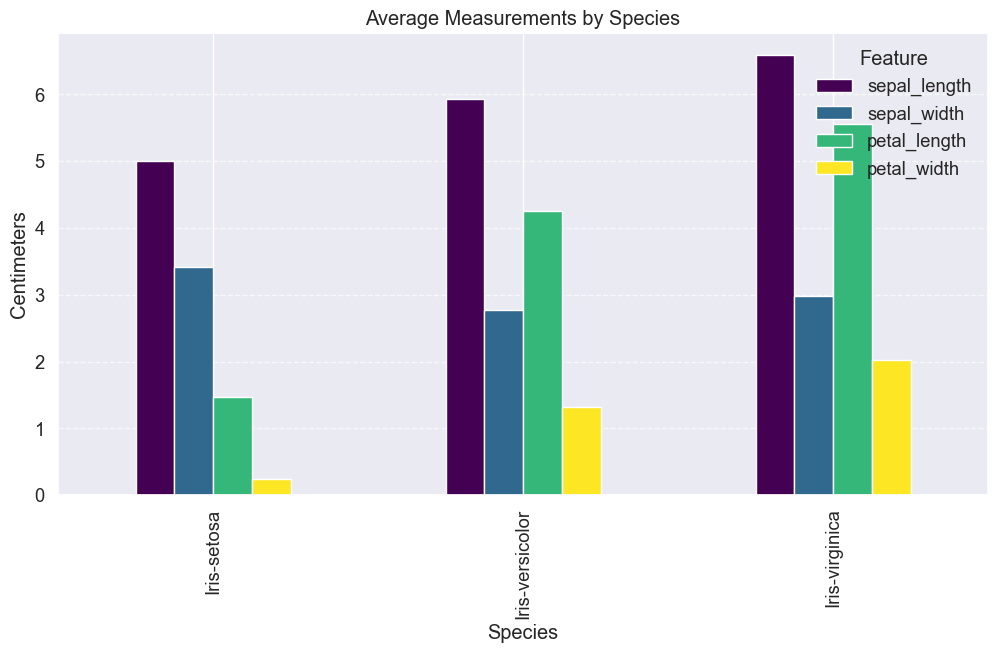

In [10]:
# Create a bar chart showing average measurements by species
species_means.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Average Measurements by Species')
plt.ylabel('Centimeters')
plt.xlabel('Species')
plt.legend(title='Feature')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4.3 Line Chart - Feature Trends by Species

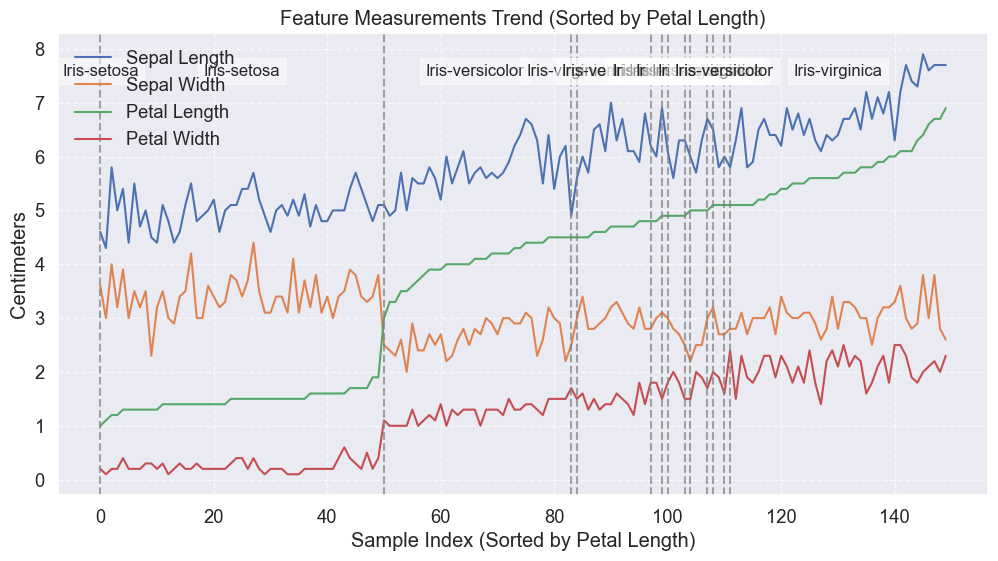

In [11]:
# Prepare data for a line chart - sorting by petal length to show trends
sorted_df = iris_df.sort_values(by='petal_length')
sorted_df = sorted_df.reset_index(drop=True)

# Plot the trend lines
plt.figure(figsize=(12, 6))

for feature in features:
    plt.plot(sorted_df.index, sorted_df[feature], label=feature.replace('_', ' ').title())

# Add markers for species transitions
species_transitions = sorted_df.loc[sorted_df['species'].shift() != sorted_df['species']].index
for transition in species_transitions:
    plt.axvline(x=transition, color='gray', linestyle='--', alpha=0.7)

species_markers = [0] + list(species_transitions) + [len(sorted_df)-1]
species_labels = sorted_df.iloc[species_markers]['species'].unique()

# Add annotations for species regions
for i in range(len(species_markers)-1):
    mid_point = (species_markers[i] + species_markers[i+1]) // 2
    plt.text(mid_point, 7.5, sorted_df.iloc[mid_point]['species'], 
             fontsize=12, ha='center', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Feature Measurements Trend (Sorted by Petal Length)')
plt.xlabel('Sample Index (Sorted by Petal Length)')
plt.ylabel('Centimeters')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 4.4 Scatter Plot - Relationships Between Features

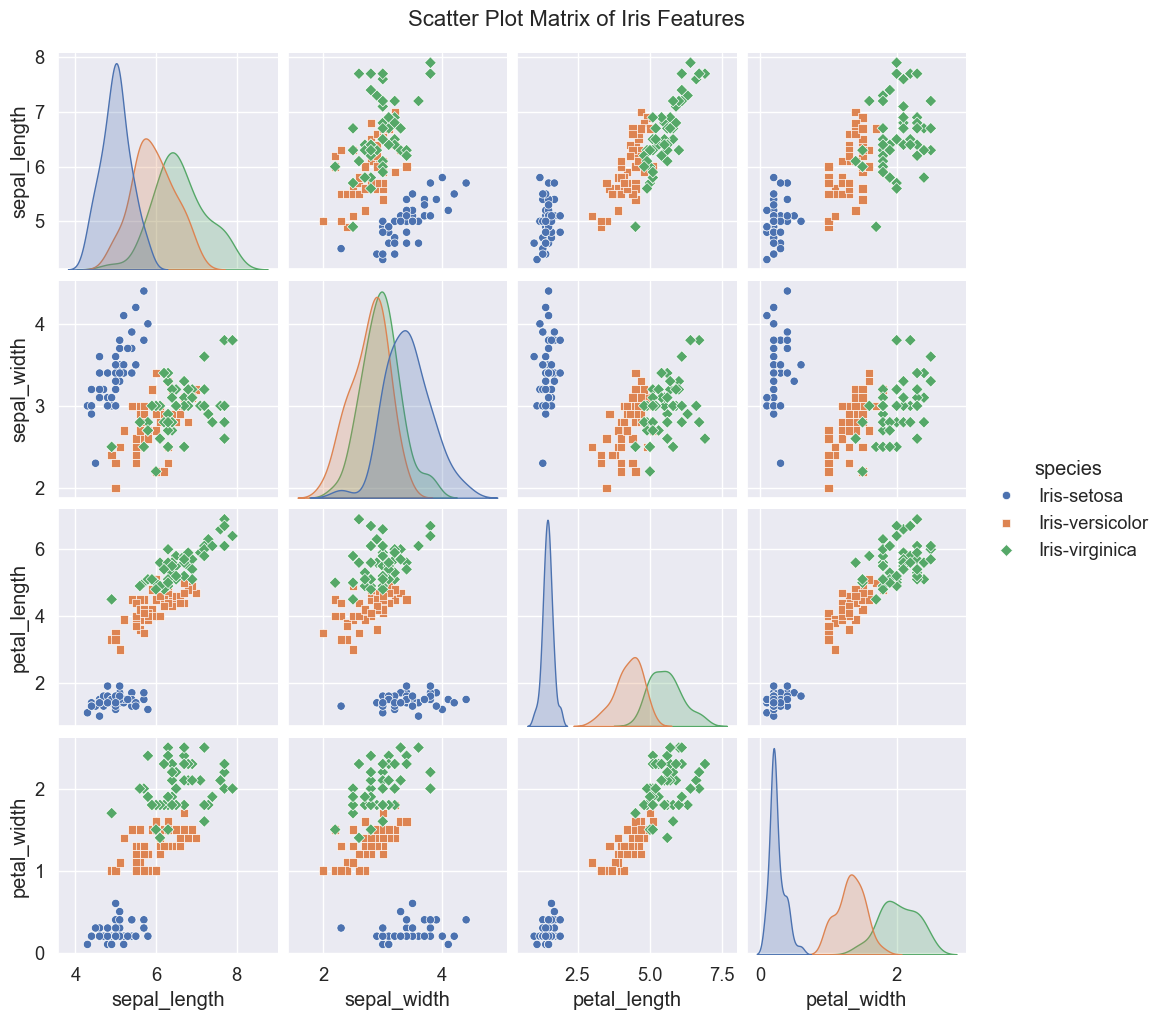

In [12]:
# Create a scatter plot matrix (pairplot) to visualize relationships between features
sns.pairplot(iris_df, hue='species', height=2.5, markers=['o', 's', 'D'])
plt.suptitle('Scatter Plot Matrix of Iris Features', y=1.02, fontsize=16)
plt.show()

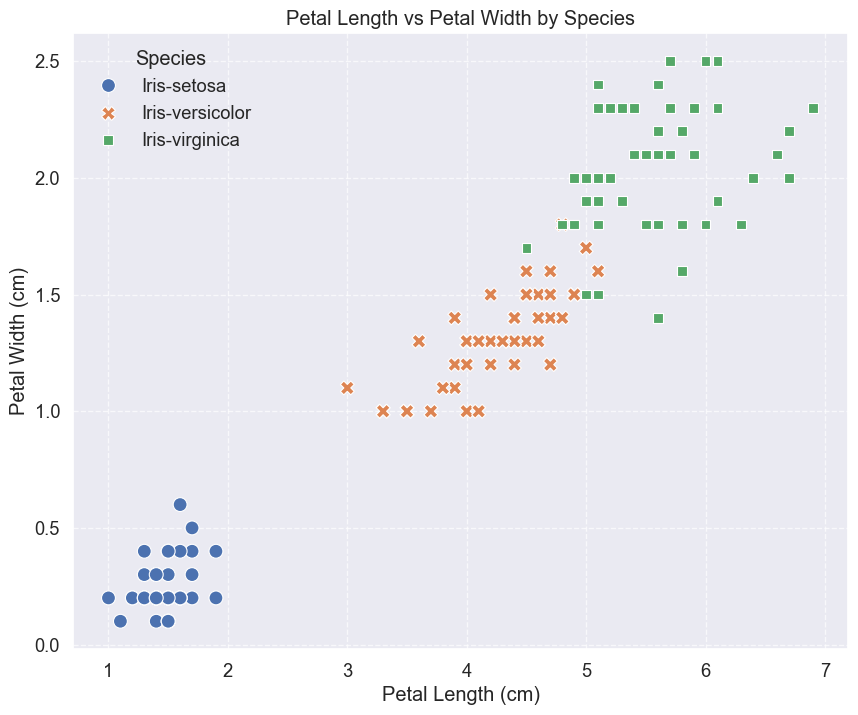

In [13]:
# Create a more detailed scatter plot for the most correlated features
plt.figure(figsize=(10, 8))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', 
                style='species', s=100, data=iris_df)

plt.title('Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 5. Key Findings and Conclusions

## 5. Summary of Findings

In this analysis, I:

1. Loaded and explored a dataset, checking for missing values and data types
2. Performed basic statistical analysis, including descriptive statistics and group-based analysis
3. Created various visualizations to understand patterns and relationships in the data:
   - Line chart to observe trends over time or sequence
   - Bar chart to compare values across categories
   - Histogram to understand the distribution of a numeric variable
   - Scatter plot to visualize relationships between two numeric variables

